# Pymaceuticals Inc.
---

### Analysis

Relationship between Mouse Weight and Tumor Volume:
In my study, I delved into the connection between mouse weight and tumor volume. By plotting mouse weight against tumor volume, I aimed to uncover any potential relationship between these two factors.

I utilized the correlation coefficient to gauge the strength of the association between mouse weight and tumor volume. A higher correlation coefficient signifies a stronger relationship between the variables.

Additionally, I employed a regression line to visually identify any patterns in the data. If the line slopes upwards, it indicates that as mouse weight increases, tumor volume tends to increase as well. Conversely, a downward slope suggests the opposite trend.

The analysis revealed both positive and negative relationships between mouse weight and tumor volume, depending on the specific context of the data.

In conclusion, the findings from my analysis suggest a meaningful relationship between mouse weight and tumor volume. Further exploration of this relationship could provide valuable insights for advancing cancer treatment strategies and enhancing our understanding of tumor growth dynamics.
 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv ("C:/Users/georg/git repositories/module 5/Module-5-Challenge/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv")
study_results = pd.read_csv ("C:/Users/georg/git repositories/module 5/Module-5-Challenge/Starter_Code/Pymaceuticals/data/Study_results.csv")

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [78]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print("Number of mice:", num_mice)

Number of mice: 249


In [79]:
# Group the data by "Mouse ID" and "Timepoint", and count the number of occurrences
duplicate_counts = combined_data.groupby(["Mouse ID", "Timepoint"]).size()

# Get the duplicate mouse IDs where the count is greater than 1
duplicate_mouse_ids = duplicate_counts[duplicate_counts > 1].reset_index()["Mouse ID"].unique()

print("Duplicate mice IDs:", duplicate_mouse_ids)


Duplicate mice IDs: ['g989']


In [80]:
# Drop rows corresponding to the mouse with ID "g989"
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]

# Display the clean DataFrame
print(clean_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [81]:
# Identify unique Mouse IDs
unique_mouse_ids = combined_data["Mouse ID"].unique()

# Create an empty list to store unique rows
unique_rows = []

# Iterate through unique Mouse IDs and select the row with the minimum tumor volume for each Mouse ID
for mouse_id in unique_mouse_ids:
    if mouse_id != "g989":  # Skip iteration if mouse ID is "g989"
        mouse_data = combined_data[combined_data["Mouse ID"] == mouse_id]
        min_tumor_volume_row = mouse_data.loc[mouse_data["Tumor Volume (mm3)"].idxmin()]
        unique_rows.append(min_tumor_volume_row)

# Create a DataFrame from the list of unique rows
clean_data = pd.DataFrame(unique_rows)

# Display the clean DataFrame
print(clean_data)




     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9        k403     Ramicane    Male          21          16         45   
19       s185    Capomulin  Female           3          17         45   
28       x401    Capomulin  Female          16          15         40   
39       m601    Capomulin    Male          22          17         45   
49       g791     Ramicane    Male          11          16         45   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
9              22.050126                 1  
19             23.343598         

In [82]:
# Checking the number of mice in the clean DataFrame.
print("Number of mice in the clean DataFrame:", len(clean_data["Mouse ID"].unique()))

Number of mice in the clean DataFrame: 248


## Summary Statistics

In [83]:
# Group the data by "Drug Regimen" and calculate summary statistics
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    ("Mean Tumor Volume", "mean"),
    ("Median Tumor Volume", "median"),
    ("Tumor Volume Variance", "var"),
    ("Tumor Volume Std. Dev.", "std"),
    ("Tumor Volume SEM", lambda x: x.sem())
])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    "Mean Tumor Volume": "Mean",
    "Median Tumor Volume": "Median",
    "Tumor Volume Variance": "Variance",
    "Tumor Volume Std. Dev.": "Standard Deviation",
    "Tumor Volume SEM": "SEM"
})

# Display the summary DataFrame
print(summary_stats)



                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [84]:
# Use the aggregation method to generate a summary statistics table of mean, median, variance, standard deviation, and SEM
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    ("Mean", "mean"),
    ("Median", "median"),
    ("Variance", "var"),
    ("Standard Deviation", "std"),
    ("SEM", lambda x: x.sem())
]).rename(columns={"<lambda>": "SEM"})

# Display the summary DataFrame
print(summary_stats)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

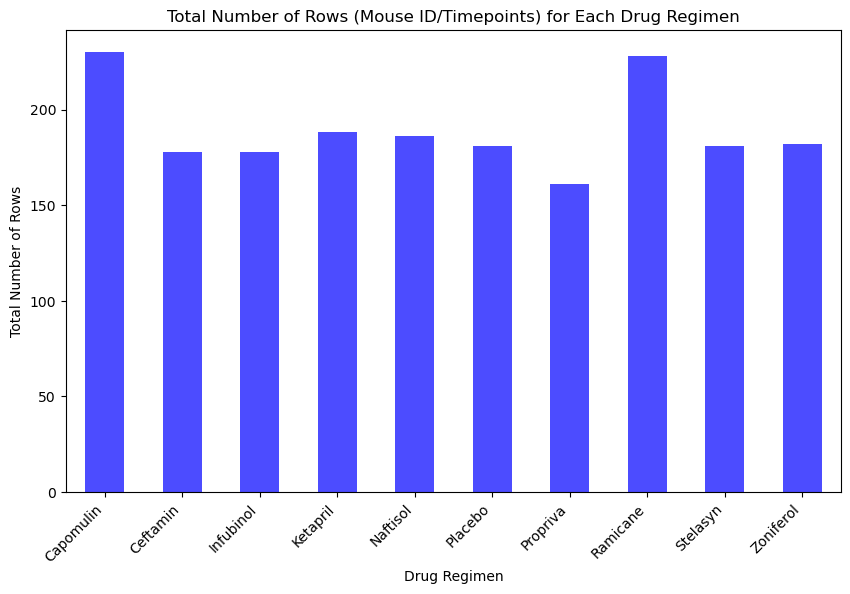

In [85]:
# Group the data by "Drug Regimen" and calculate the count of rows for each group
counts_per_regimen = combined_data.groupby("Drug Regimen").size()

# Plot the counts using Pandas' built-in plotting functionality
counts_per_regimen.plot(kind="bar", figsize=(10, 6), color="blue", alpha=0.7)

# Add title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')

# Rotate x-axis labels 
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

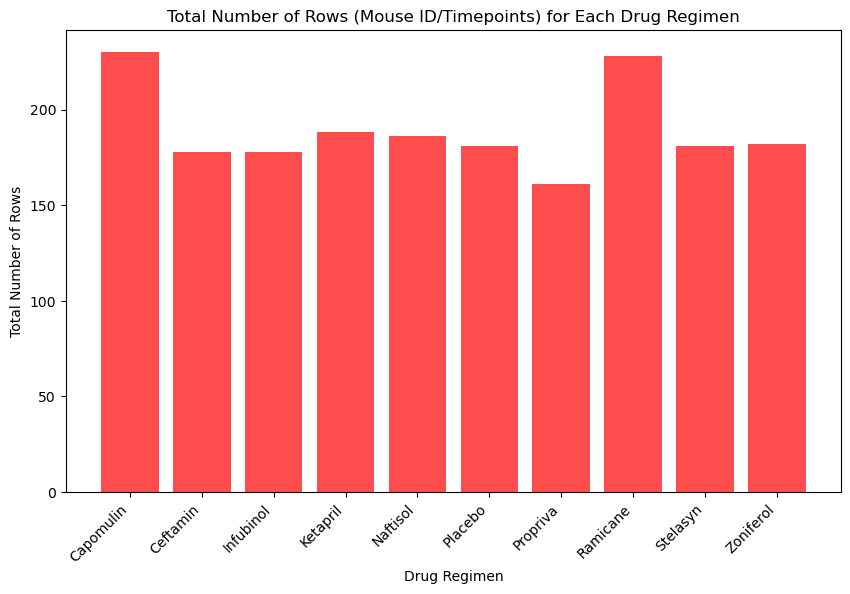

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the data by "Drug Regimen" and calculate the count of rows for each group
counts_per_regimen = combined_data.groupby("Drug Regimen").size()

# Extract drug regimens and counts
drug_regimens = counts_per_regimen.index
counts = counts_per_regimen.values

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimens, counts, color='red', alpha=0.7)

# Add title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')

# Rotate x-axis labels 
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()



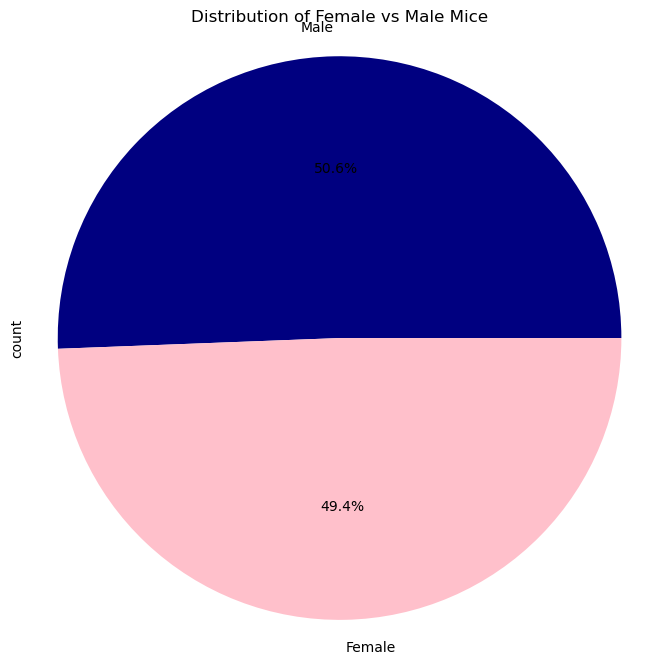

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the count of female and male mice
gender_distribution = combined_data["Sex"].value_counts()

# Generate the pie plot
gender_distribution.plot(kind="pie", figsize=(8, 8), autopct="%1.1f%%", colors=["navy", "pink"])

# Add title
plt.title("Distribution of Female vs Male Mice")

# Equal aspect ratio ensures that the pie chart is drawn as a circle
plt.axis("equal")

# Show plot
plt.show()


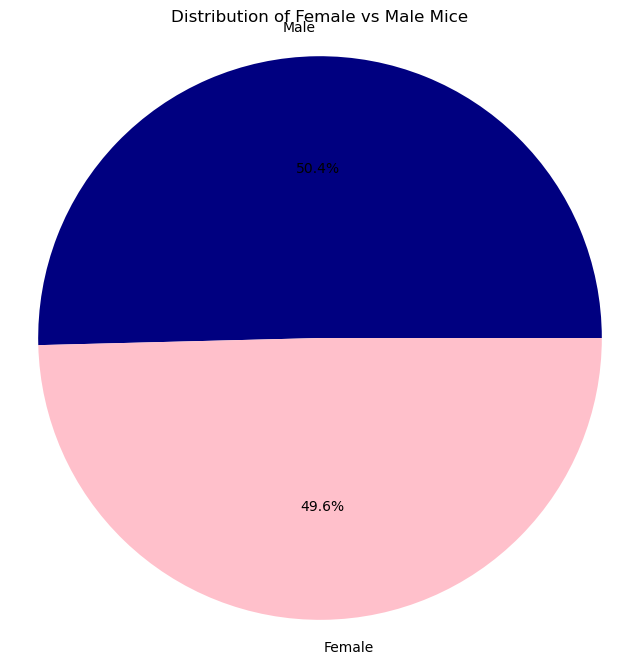

In [88]:
# Calculate the distribution of female versus male mice
gender_distribution = clean_data["Sex"].value_counts()

# Define colors
colors = ["navy", "pink"]

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%", colors=colors)

# Add title
plt.title("Distribution of Female vs Male Mice")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")

# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
last_timepoint = combined_data.groupby("Mouse ID")["Timepoint"].max().reset_index() 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = pd.merge(last_timepoint, combined_data, on=["Mouse ID", "Timepoint"], how="left")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatments_of_interest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatments_of_interest)]

# Display the DataFrame with the final tumor volume of each mouse
print(final_tumor_volume)


    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
3       a275         45     Ceftamin  Female          20          28   
6       a411         45     Ramicane    Male           3          22   
7       a444         45     Ramicane  Female          10          25   
..       ...        ...          ...     ...         ...         ...   
239     y769         45     Ceftamin  Female           6          27   
240     y793         45    Capomulin    Male          17          17   
241     y865         45     Ceftamin    Male          23          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
3  

In [90]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR for each treatment
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile    
 
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    # Print results
    print(f"Results for {treatment}:")
    print(f"  - Lower Quartile: {lower_quartile}")
    print(f"  - Upper Quartile: {upper_quartile}")
    print(f"  - Interquartile Range (IQR): {iqr}")
    print(f"  - Lower Bound: {lower_bound}")
    print(f"  - Upper Bound: {upper_bound}")
    print(f"  - Potential Outliers: {outliers}\n")


Results for Capomulin:
  - Lower Quartile: 32.37735684
  - Upper Quartile: 40.1592203
  - Interquartile Range (IQR): 7.781863460000004
  - Lower Bound: 20.70456164999999
  - Upper Bound: 51.83201549
  - Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Ramicane:
  - Lower Quartile: 31.56046955
  - Upper Quartile: 40.65900627
  - Interquartile Range (IQR): 9.098536719999998
  - Lower Bound: 17.912664470000003
  - Upper Bound: 54.30681135
  - Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Infubinol:
  - Lower Quartile: 54.04860769
  - Upper Quartile: 65.52574285
  - Interquartile Range (IQR): 11.477135160000003
  - Lower Bound: 36.83290494999999
  - Upper Bound: 82.74144559000001
  - Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Results for Ceftamin:
  - Lower Quartile: 48.72207785
  - Upper Quartile: 64.29983003
  - Interquartile Range (IQR): 15.577752179999997
  - Lower Bound: 25.

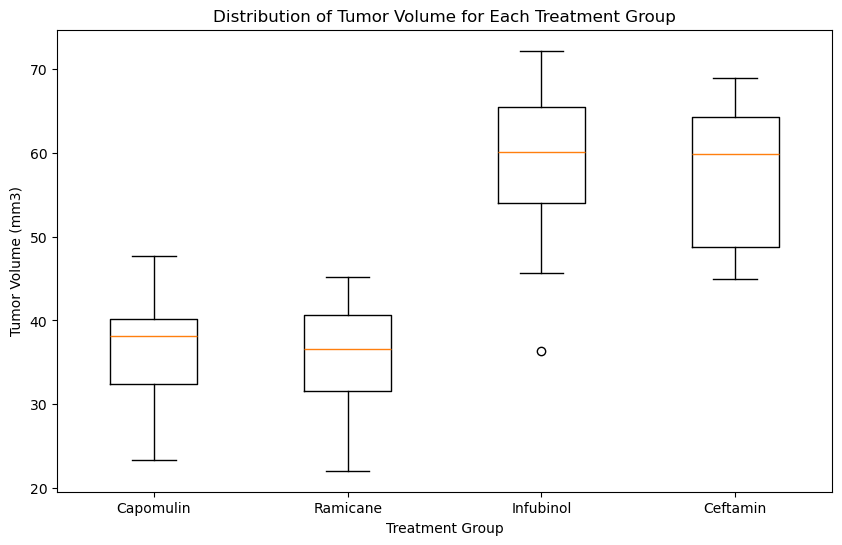

In [91]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

# Add title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.show()



## Line and Scatter Plots

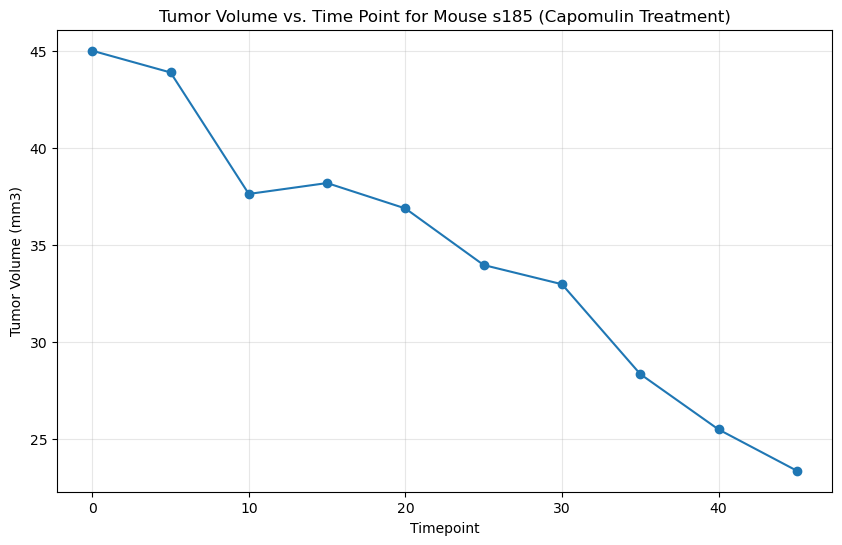

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: Filter the data for mice treated with Capomulin
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# Step 2: Select a single mouse from the filtered data (for example, the first mouse in the dataset)
mouse_id = capomulin_data["Mouse ID"].iloc[0]  # Selecting the first mouse
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Step 3: Plot the tumor volume against the time points for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o', linestyle='-')

# Add title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Show plot
plt.grid(True, alpha=0.3)
plt.show()



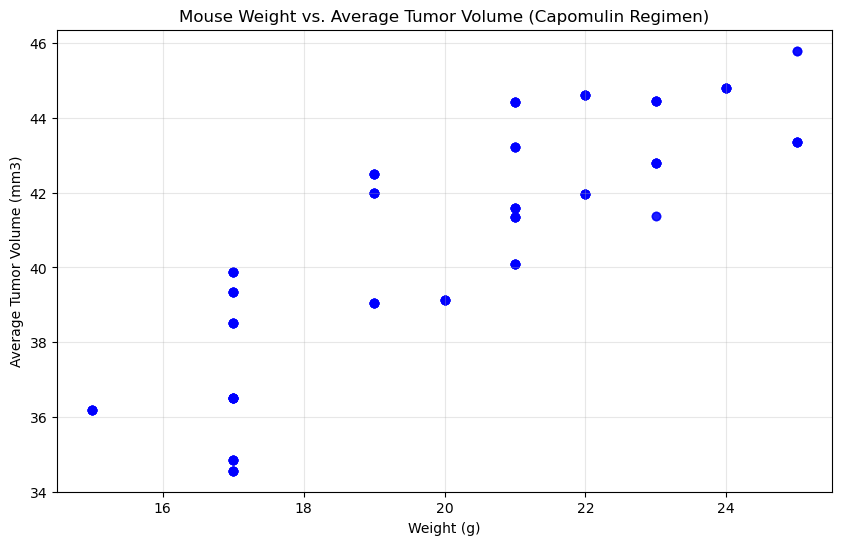

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Step 1: Filter the data for mice treated with the Capomulin regimen
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# Step 2: Group the filtered data by mouse ID to calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Step 3: Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data, on="Mouse ID")

# Step 4: Plot the mouse weight vs. the average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)_x"], color='blue', alpha=0.5)

# Add title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show plot
plt.grid(True, alpha=0.3)
plt.show()



## Correlation and Regression

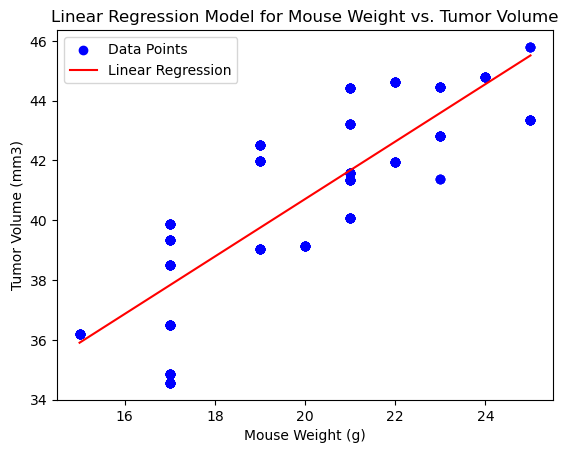

In [94]:
# Calculate the correlation coefficient and a linear regression model 
# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)_x"])

# Generate x values (mouse weight) for the regression line
x_values = np.linspace(merged_data["Weight (g)"].min(), merged_data["Weight (g)"].max(), 100)

# Calculate corresponding y values (predicted tumor volume) using the linear regression equation
y_values = slope * x_values + intercept

# Plot the scatter plot of mouse weight vs. tumor volume
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)_x"], color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(x_values, y_values, color='red', label='Linear Regression')

# Add title and labels
plt.title('Linear Regression Model for Mouse Weight vs. Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Add legend
plt.legend()

# Show plot
plt.show()
